# **FINAL PROJECT - MOBILE PHONE PRICE CLASSIFICATION**
>> Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

>> He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

>> Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

>> In this problem you do not have to predict actual price but a price range indicating how high the price is.





# **1.  IMPORT LIBRARIES**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 109 kB/s 


In [ ]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from catboost import CatBoostClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# **2. LOAD AND EXPLORE DATA**

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

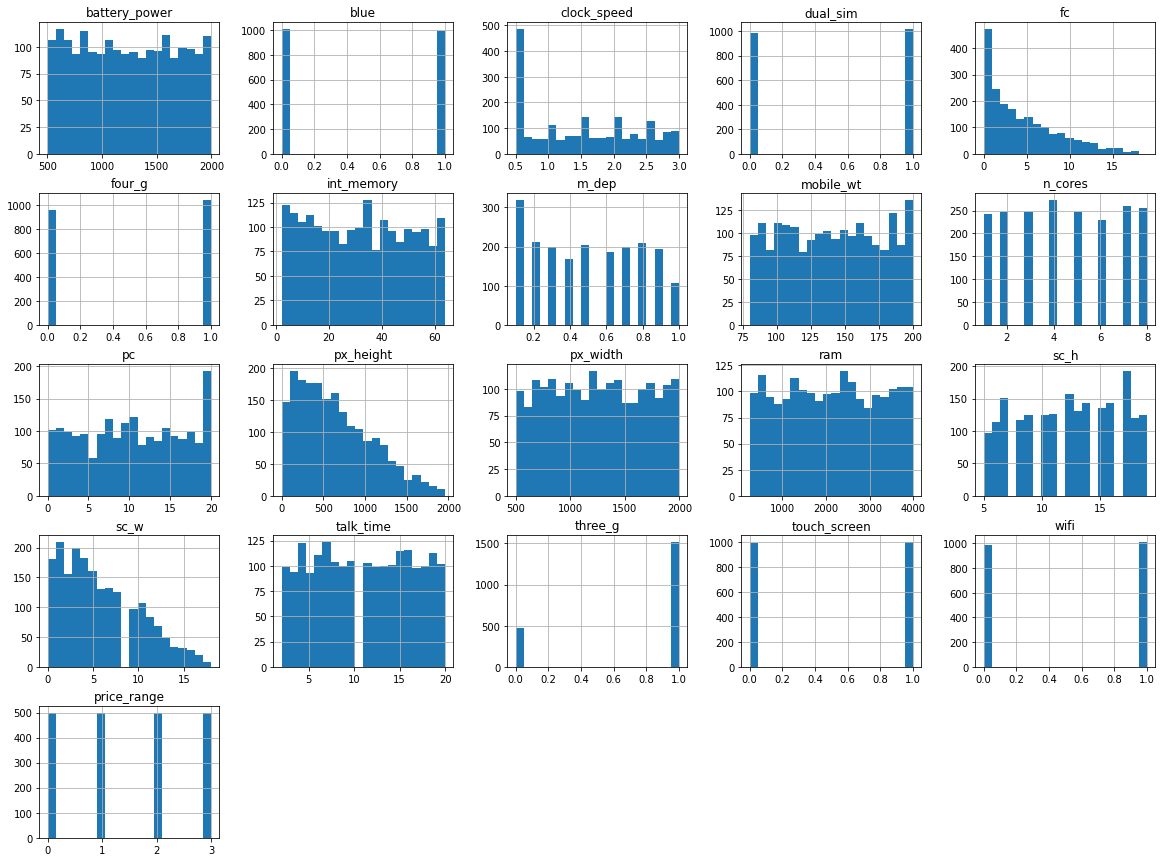

In [ ]:
%matplotlib inline
df.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
def describe(df, column):
  print("Null: ", df[column].isna().sum())
  print("###")
  print("describe: ", df[column].describe())
  print("####")
  fig, axs = plt.subplots(3,1, figsize = (18,10))
  axs[0].hist(df[column])
  axs[1].boxplot(df[column], vert = False)
  axs[2].scatter(df[column], df['price_range'])
  axs[2].set_xlabel(column)
  axs[2].set_ylabel('price_range')


Null:  0
###
describe:  count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64
####


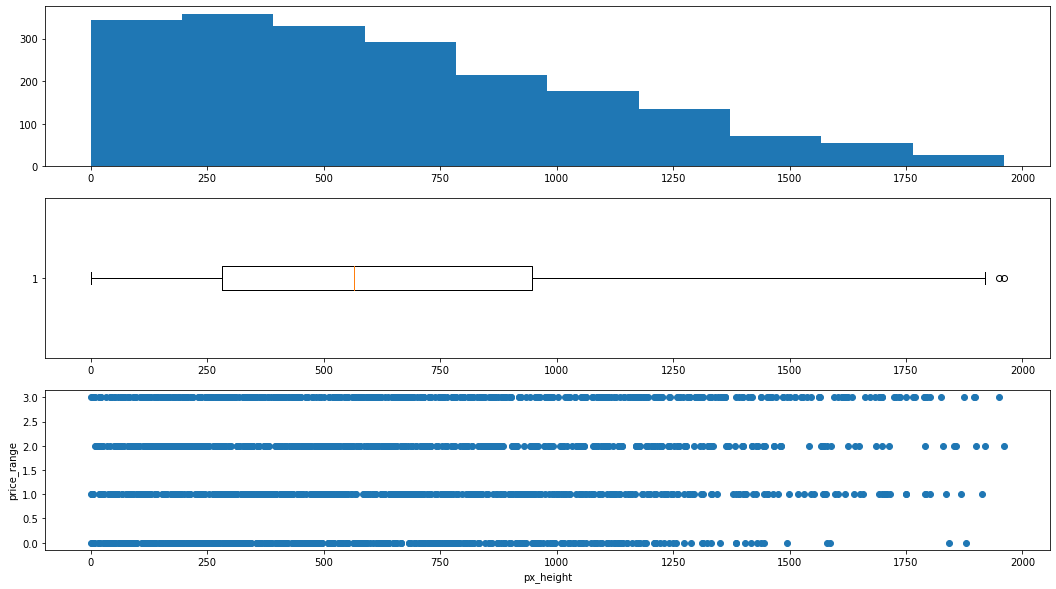

In [ ]:
describe(df, 'px_height')

Null:  0
###
describe:  count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64
####


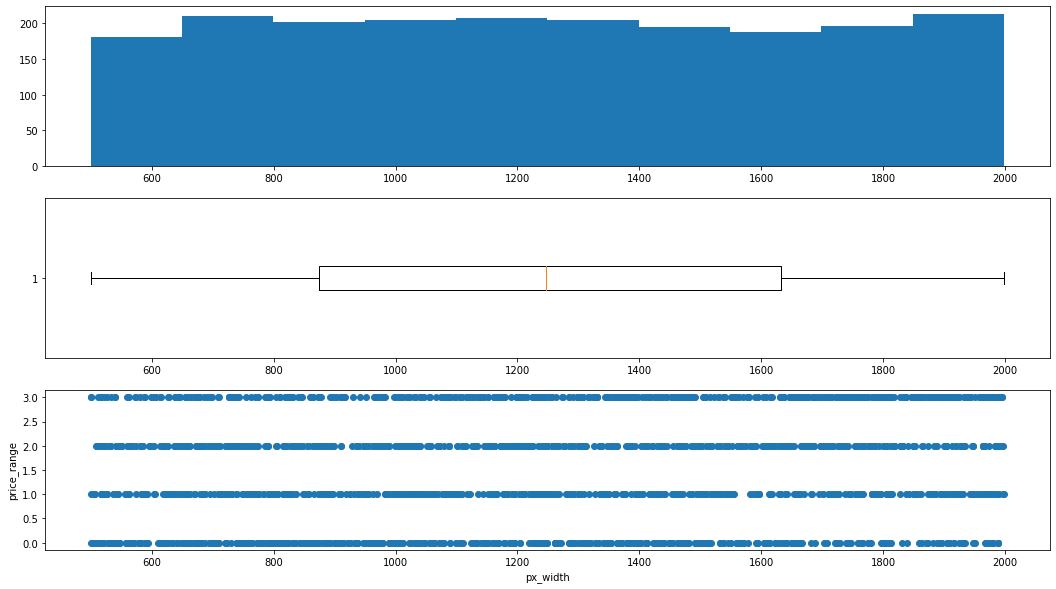

In [ ]:
describe(df, 'px_width')

Null:  0
###
describe:  count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64
####


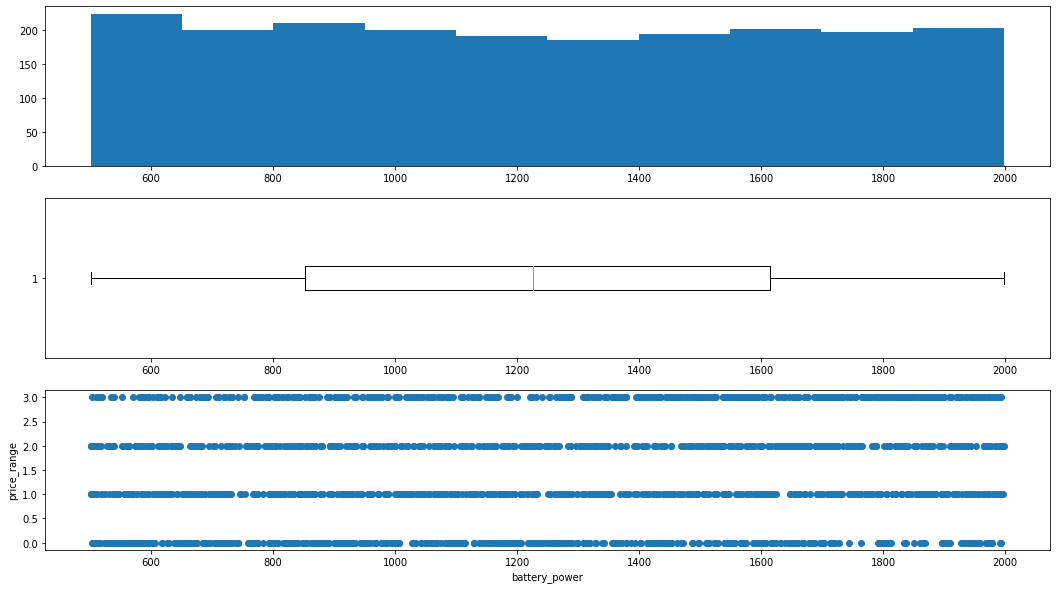

In [ ]:
describe(df, 'battery_power')

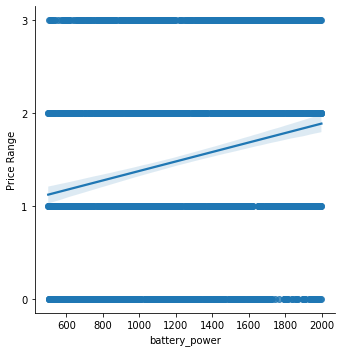

In [ ]:
sns.lmplot(x='battery_power', y='price_range', data=df, )
plt.yticks([0, 1, 2, 3])
plt.xlabel('battery_power')
plt.ylabel('Price Range')
plt.show()

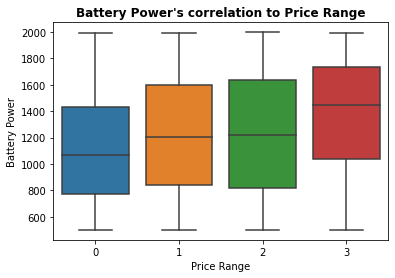

In [ ]:
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power\'s correlation to Price Range', weight='bold')
plt.show()

Null:  0
###
describe:  count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64
####


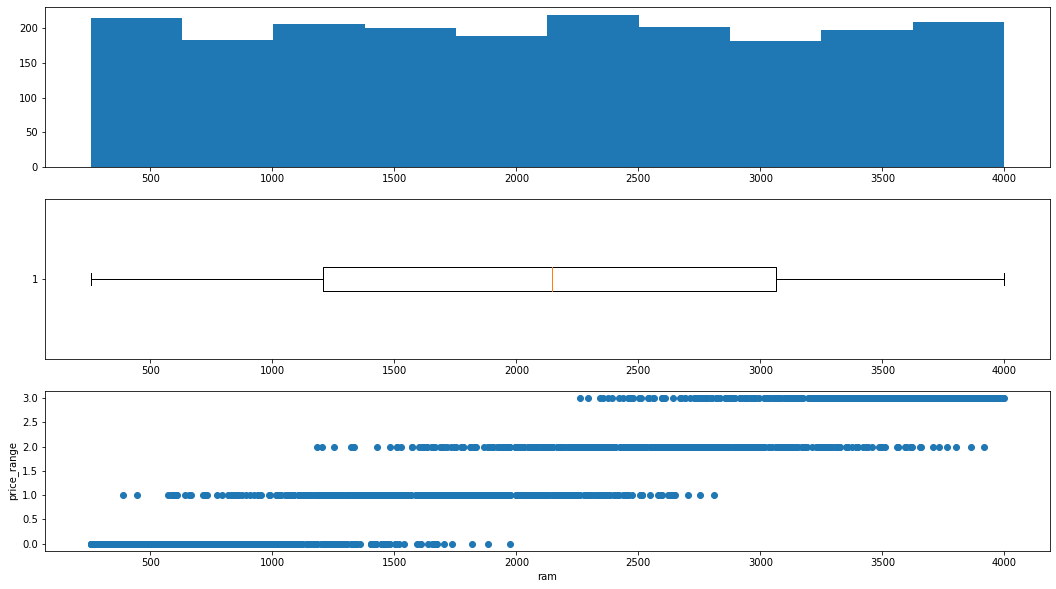

In [ ]:
describe(df, 'ram')

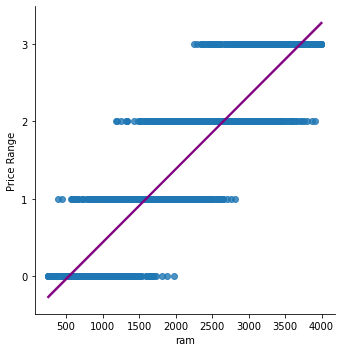

In [ ]:
sns.lmplot(x='ram', y='price_range', data=df, line_kws={'color': 'purple'})
plt.yticks([0, 1, 2, 3])
plt.xlabel('ram')
plt.ylabel('Price Range')
plt.show()

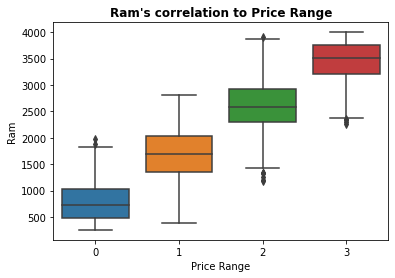

In [ ]:
sns.boxplot(x='price_range', y='ram', data=df)
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.title('Ram\'s correlation to Price Range', weight='bold')
plt.show()

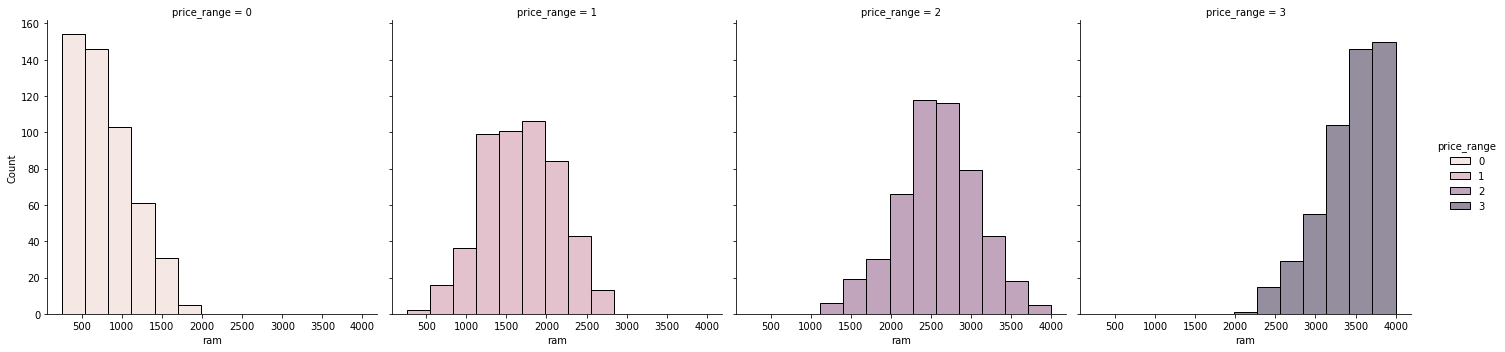

In [ ]:
sns.displot(data=df, x="ram", hue="price_range", col="price_range")
plt.show()

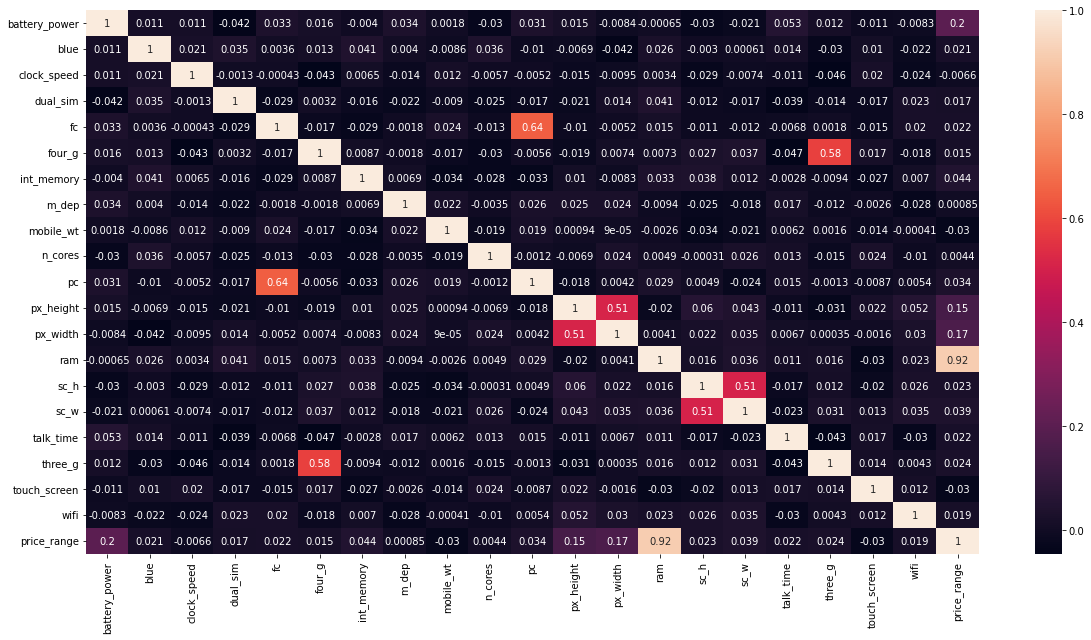

In [ ]:
correlation = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [ ]:
correlation['price_range'].sort_values(ascending = False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

The presented matrix of correlation between the variables shows that there is a strong correlation between RAM and theprice_range. So as the memory increases, so does the price of the phone.

# **3. STANDARDISED AND NORMALISED DATA**

In [ ]:
df_copy = df.copy(deep = True)

In [ ]:
y = df_copy.pop('price_range')

In [ ]:
X = df_copy

In [ ]:
cols_to_scale = ['battery_power', 'mobile_wt', 'px_height',
       'px_width', 'ram']

In [ ]:
def get_standardized_df(df: pd.DataFrame, cols_to_scale: list) -> pd.DataFrame:
    result = df.copy(deep=True)
    scaler = StandardScaler()
    scaler.fit(result[cols_to_scale])
    result[cols_to_scale] = scaler.transform(result[cols_to_scale])
    return result

In [ ]:
def get_normalized_df(df: pd.DataFrame) -> pd.DataFrame:
    return (df-df.min()) / (df.max() - df.min())

In [ ]:
X_standard = get_standardized_df(X, cols_to_scale)

In [ ]:
X_normal = get_normalized_df(X)

# **4. SPLIT THE DATA INTO TESTING AND TRAINING SUBSETS**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [ ]:
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y, test_size=0.2, random_state=5, stratify=y)

In [ ]:
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y, test_size=0.2, random_state=5, stratify=y)

# **5. TESTING DIFFERENT ALGORITHMS**

In [ ]:
def calculate_metrics(target, prediction, average='weighted'):
    accuracy = metrics.accuracy_score(target, prediction)
    precision = metrics.precision_score(target, prediction, average=average, zero_division = 1)
    recall = metrics.recall_score(target, prediction, average=average)
    f1 = metrics.f1_score(target, prediction, average=average)
    return accuracy, precision, recall, f1

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print('\n')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix:')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **DECISION TREE**

DATA WITHOUT NORMALIZATION AND STANDARIZATION

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)

In [ ]:
dt.feature_importances_

array([0.09364168, 0.        , 0.00125   , 0.00333333, 0.01430733,
       0.00387346, 0.00594143, 0.00891888, 0.01614008, 0.00743143,
       0.00772751, 0.07944154, 0.09448275, 0.64545137, 0.00382888,
       0.00590167, 0.00721756, 0.        , 0.        , 0.00111111])

Results for Decision Tree Classifier
----
  Accuracy:  0.855
  Precision: 0.8541333809375047
  Recall:    0.855
  F1 score:  0.8543735142220947


Confusion matrix:


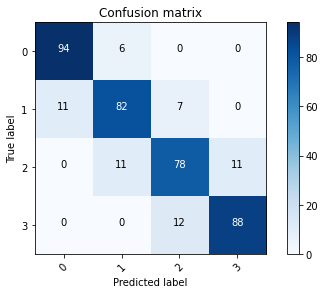

In [ ]:
print_results(calculate_metrics(y_test, y_dt), 'Decision Tree Classifier')
cm = metrics.confusion_matrix(y_test, y_dt)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

STANDARDIZED DATA

In [ ]:
dt_standard = DecisionTreeClassifier()
dt_standard.fit(X_train_standard, y_train_standard)
y_dt_standard = dt_standard.predict(X_test_standard)

In [ ]:
dt_standard.feature_importances_

array([0.09562672, 0.        , 0.00361111, 0.00333333, 0.00738864,
       0.00262346, 0.00399698, 0.01021253, 0.01229088, 0.00409524,
       0.00819647, 0.08080973, 0.10273066, 0.64499669, 0.00368999,
       0.00863976, 0.00521812, 0.        , 0.00142857, 0.00111111])

Results for Decision Tree Classifier - standardised data
----
  Accuracy:  0.86
  Precision: 0.8590821058374251
  Recall:    0.86
  F1 score:  0.8592418047141283


Confusion matrix:


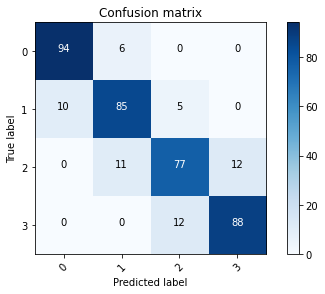

In [ ]:
print_results(calculate_metrics(y_test_standard, y_dt_standard), 'Decision Tree Classifier - standardised data')
cm = metrics.confusion_matrix(y_test_standard, y_dt_standard)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

NORMALIZED DATA

In [ ]:
dt_normal = DecisionTreeClassifier()
dt_normal.fit(X_train_normal, y_train_normal)
y_dt_normal = dt_normal.predict(X_test_normal)

In [ ]:
dt_normal.feature_importances_

array([0.09746006, 0.00083333, 0.00386111, 0.00333333, 0.00721007,
       0.00387346, 0.00449954, 0.00697443, 0.01320766, 0.00423413,
       0.00371061, 0.08382778, 0.10012221, 0.64381645, 0.00591221,
       0.0072231 , 0.00847194, 0.        , 0.00142857, 0.        ])

Results for Decision Tree Classifier - normalised data
----
  Accuracy:  0.855
  Precision: 0.8542568365138697
  Recall:    0.855
  F1 score:  0.8541651499708794


Confusion matrix:


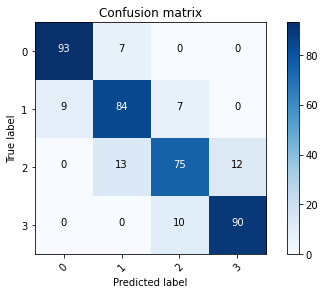

In [ ]:
print_results(calculate_metrics(y_test_normal, y_dt_normal), 'Decision Tree Classifier - normalised data')
cm = metrics.confusion_matrix(y_test_normal, y_dt_normal)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

## **RANDOM FOREST**

DATA WITHOUT NORMALIZATION AND STANDARIZATION

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [ ]:
rf.feature_importances_

array([0.07647671, 0.00658893, 0.02907331, 0.00629396, 0.02503427,
       0.00687414, 0.03875096, 0.02366439, 0.03981026, 0.02407306,
       0.02996583, 0.05464014, 0.05542264, 0.47488445, 0.02866404,
       0.02894978, 0.03014596, 0.00678687, 0.00777675, 0.00612354])

Results for Random Forest
----
  Accuracy:  0.8775
  Precision: 0.8769229567683177
  Recall:    0.8775
  F1 score:  0.8770692606558222


Confusion matrix:


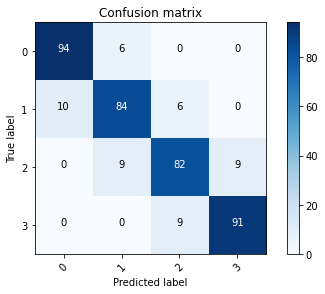

In [ ]:
print_results(calculate_metrics(y_test, y_rf), 'Random Forest')
cm = metrics.confusion_matrix(y_test, y_rf)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

STANDARDIZED DATA

In [ ]:
rf_standard = RandomForestClassifier()
rf_standard.fit(X_train_standard, y_train_standard)
y_rf_standard = rf_standard.predict(X_test_standard)

In [ ]:
rf_standard.feature_importances_

array([0.07789858, 0.00645518, 0.02890702, 0.00691035, 0.02599451,
       0.00644544, 0.03532175, 0.02610716, 0.03862068, 0.02347478,
       0.02955507, 0.05339552, 0.05558732, 0.4755494 , 0.02977055,
       0.02888064, 0.03089638, 0.00580189, 0.00777397, 0.00665382])

Results for Random forest - standardised data
----
  Accuracy:  0.8875
  Precision: 0.8869772952965604
  Recall:    0.8875
  F1 score:  0.8868967722606059


Confusion matrix:


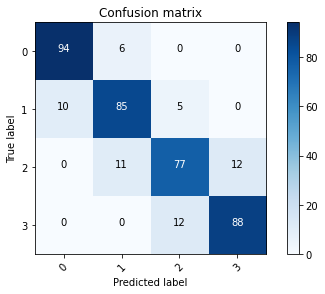

In [ ]:
print_results(calculate_metrics(y_test_standard, y_rf_standard), 'Random forest - standardised data')
cm = metrics.confusion_matrix(y_test_standard, y_dt_standard)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

NORMALIZED DATA

In [ ]:
rf_normal = RandomForestClassifier()
rf_normal.fit(X_train_normal, y_train_normal)
y_rf_normal = rf_normal.predict(X_test_normal)

In [ ]:
rf_normal.feature_importances_

array([0.07351417, 0.00715213, 0.02967446, 0.0072639 , 0.02447568,
       0.00667433, 0.03744675, 0.02533249, 0.04068177, 0.02448232,
       0.02857637, 0.05769984, 0.05890905, 0.46926288, 0.02846968,
       0.02931012, 0.03191749, 0.00498282, 0.00720532, 0.00696842])

Results for Random forest - normalised data
----
  Accuracy:  0.8925
  Precision: 0.8926418247711456
  Recall:    0.8925
  F1 score:  0.8922678098829181


Confusion matrix:


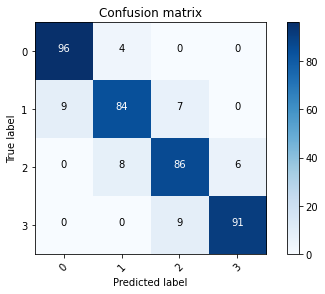

In [ ]:
print_results(calculate_metrics(y_test_normal, y_rf_normal), 'Random forest - normalised data')
cm = metrics.confusion_matrix(y_test_normal, y_rf_normal)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

## **KNN ALGORITHM**

DATA WITHOUT NORMALIZATION AND STANDARIZATION

In [ ]:
rate_val = []

for k in range(20):
  k=k+1
  knn = KNeighborsClassifier(n_neighbors = k)

  knn.fit(X_train, y_train.values.ravel())
  predict = knn.predict(X_test)
  error=sqrt(mean_squared_error(y_test, predict))
  rate_val.append(error)
  print('rate_val for k = {} is {} errors'.format(k, error))

rate_val for k = 1 is 0.3082207001484488 errors
rate_val for k = 2 is 0.32787192621510003 errors
rate_val for k = 3 is 0.29154759474226505 errors
rate_val for k = 4 is 0.29154759474226505 errors
rate_val for k = 5 is 0.282842712474619 errors
rate_val for k = 6 is 0.282842712474619 errors
rate_val for k = 7 is 0.2598076211353316 errors
rate_val for k = 8 is 0.2783882181415011 errors
rate_val for k = 9 is 0.2598076211353316 errors
rate_val for k = 10 is 0.25495097567963926 errors
rate_val for k = 11 is 0.25495097567963926 errors
rate_val for k = 12 is 0.2449489742783178 errors
rate_val for k = 13 is 0.25 errors
rate_val for k = 14 is 0.2692582403567252 errors
rate_val for k = 15 is 0.2645751311064591 errors
rate_val for k = 16 is 0.2598076211353316 errors
rate_val for k = 17 is 0.25495097567963926 errors
rate_val for k = 18 is 0.2598076211353316 errors
rate_val for k = 19 is 0.2645751311064591 errors
rate_val for k = 20 is 0.27386127875258304 errors


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

Results for KNN Algorithm - 9 neighbours
----
  Accuracy:  0.9325
  Precision: 0.9328423981390144
  Recall:    0.9325
  F1 score:  0.9324971230550926


Confusion matrix:


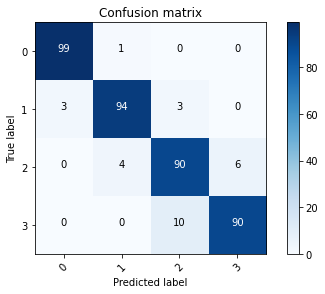

In [ ]:
print_results(calculate_metrics(y_test, y_knn), 'KNN Algorithm - 9 neighbours')
cm = metrics.confusion_matrix(y_test, y_knn)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

STANDARDIZED DATA

In [ ]:
rate_val2 = []

for k in range(20):
  k=k+1
  knn_standard = KNeighborsClassifier(n_neighbors = k)

  knn_standard.fit(X_train_standard, y_train_standard.values.ravel())
  predict2 = knn_standard.predict(X_test_standard)
  error=sqrt(mean_squared_error(y_test_standard, predict2))
  rate_val2.append(error)
  print('rate_val for k = {} is {} errors'.format(k, error))

rate_val for k = 1 is 1.4159802258506295 errors
rate_val for k = 2 is 1.4352700094407325 errors
rate_val for k = 3 is 1.489966442575134 errors
rate_val for k = 4 is 1.484082207965583 errors
rate_val for k = 5 is 1.449137674618944 errors
rate_val for k = 6 is 1.47648230602334 errors
rate_val for k = 7 is 1.4404860290887933 errors
rate_val for k = 8 is 1.3955285736952863 errors
rate_val for k = 9 is 1.3702189606044721 errors
rate_val for k = 10 is 1.4370107863199915 errors
rate_val for k = 11 is 1.3991068579633223 errors
rate_val for k = 12 is 1.452583904633395 errors
rate_val for k = 13 is 1.3991068579633223 errors
rate_val for k = 14 is 1.4309088021254184 errors
rate_val for k = 15 is 1.4628738838327795 errors
rate_val for k = 16 is 1.4832396974191326 errors
rate_val for k = 17 is 1.4230249470757708 errors
rate_val for k = 18 is 1.4326548781894404 errors
rate_val for k = 19 is 1.4430869689661812 errors
rate_val for k = 20 is 1.4221462653327892 errors


In [ ]:
knn_standard = KNeighborsClassifier(n_neighbors = 4)
knn_standard.fit(X_train_standard, y_train_standard)
y_knn_standard = knn_standard.predict(X_test_standard)

Results for KNN Algorithm - 4 neighbours with standardised data
----
  Accuracy:  0.2975
  Precision: 0.3093144169867546
  Recall:    0.2975
  F1 score:  0.2962056676811781


Confusion matrix:


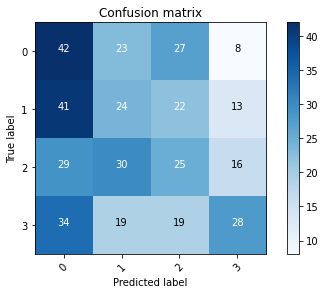

In [ ]:
print_results(calculate_metrics(y_test_standard, y_knn_standard), 'KNN Algorithm - 4 neighbours with standardised data')
cm = metrics.confusion_matrix(y_test_standard, y_knn_standard)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

NORMALIZED DATA

In [ ]:
rate_val3 = []

for k in range(20):
  k=k+1
  knn_normal = KNeighborsClassifier(n_neighbors = k)

  knn_normal.fit(X_train_normal, y_train_normal.values.ravel())
  predict3 = knn_normal.predict(X_test_normal)
  error=sqrt(mean_squared_error(y_test_normal, predict3))
  rate_val2.append(error)
  print('rate_val for k = {} is {} errors'.format(k, error))

rate_val for k = 1 is 1.1258330249197703 errors
rate_val for k = 2 is 1.1715374513859982 errors
rate_val for k = 3 is 1.2072696467649635 errors
rate_val for k = 4 is 1.105667219374799 errors
rate_val for k = 5 is 1.0712142642814275 errors
rate_val for k = 6 is 1.0897247358851685 errors
rate_val for k = 7 is 1.0559356040971437 errors
rate_val for k = 8 is 0.9937303457175896 errors
rate_val for k = 9 is 0.9604686356149273 errors
rate_val for k = 10 is 0.9962429422585638 errors
rate_val for k = 11 is 0.9630680142129111 errors
rate_val for k = 12 is 0.9630680142129111 errors
rate_val for k = 13 is 0.9394147114027968 errors
rate_val for k = 14 is 0.9151502608861564 errors
rate_val for k = 15 is 0.9205976319760985 errors
rate_val for k = 16 is 0.9055385138137416 errors
rate_val for k = 17 is 0.917877987534291 errors
rate_val for k = 18 is 0.9192388155425117 errors
rate_val for k = 19 is 0.916515138991168 errors
rate_val for k = 20 is 0.9137833441248533 errors


In [ ]:
knn_normal= KNeighborsClassifier(n_neighbors = 4)
knn_normal.fit(X_train_normal, y_train_normal)
y_knn_normal = knn_normal.predict(X_test_normal)

Results for KNN Algorithm - 4 neighbours with normalised data
----
  Accuracy:  0.385
  Precision: 0.3993706896585873
  Recall:    0.385
  F1 score:  0.38620652637746117


Confusion matrix:


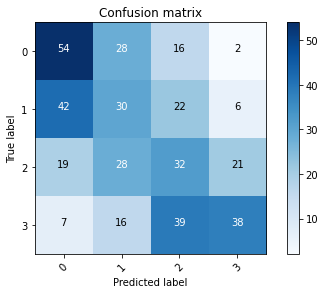

In [ ]:
print_results(calculate_metrics(y_test_normal, y_knn_normal), 'KNN Algorithm - 4 neighbours with normalised data')
cm = metrics.confusion_matrix(y_test_normal, y_knn_normal)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

## **ADABOOST**

DATA WITHOUT NORMALIZATION AND STANDARIZATION

In [ ]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_ab = ab.predict(X_test)

Results for AdaBoost
----
  Accuracy:  0.595
  Precision: 0.6829881727737351
  Recall:    0.595
  F1 score:  0.5746110287298781


Confusion matrix:


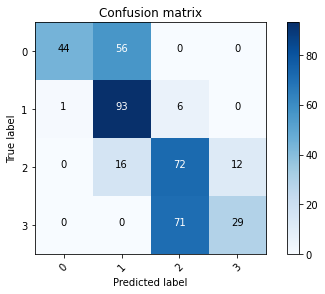

In [ ]:
print_results(calculate_metrics(y_test, y_ab), 'AdaBoost')
cm = metrics.confusion_matrix(y_test, y_ab)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

STANDARDIZED DATA

In [ ]:
ab_standard = AdaBoostClassifier()
ab_standard.fit(X_train_standard, y_train_standard)
y_ab_standard = ab_standard.predict(X_test_standard)

Results for AdaBoost with standardized data
----
  Accuracy:  0.595
  Precision: 0.6829881727737351
  Recall:    0.595
  F1 score:  0.5746110287298781


Confusion matrix:


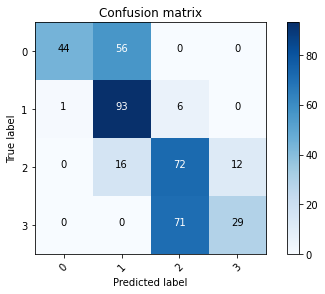

In [ ]:
print_results(calculate_metrics(y_test_standard, y_ab_standard), 'AdaBoost with standardized data')
cm = metrics.confusion_matrix(y_test_standard, y_ab_standard)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

NORMALIZED DATA

In [ ]:
ab_normal = AdaBoostClassifier()
ab_normal.fit(X_train_normal, y_train_normal)
y_ab_normal = ab_normal.predict(X_test_normal)

Results for AdaBoost with normalized data
----
  Accuracy:  0.595
  Precision: 0.6829881727737351
  Recall:    0.595
  F1 score:  0.5746110287298781


Confusion matrix:


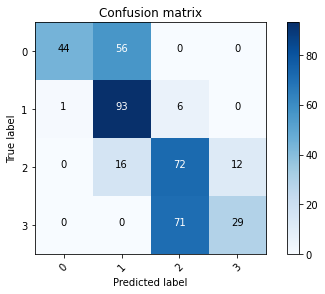

In [ ]:
print_results(calculate_metrics(y_test_normal, y_ab_normal), 'AdaBoost with normalized data')
cm = metrics.confusion_matrix(y_test_normal, y_ab_normal)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

## **XGBOOST**

DATA WITHOUT NORMALIZATION AND STANDARIZATION

In [ ]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_xg = xg.predict(X_test)

Results for XGBoost
----
  Accuracy:  0.91
  Precision: 0.90989098909891
  Recall:    0.91
  F1 score:  0.9099227480687017


Confusion matrix:


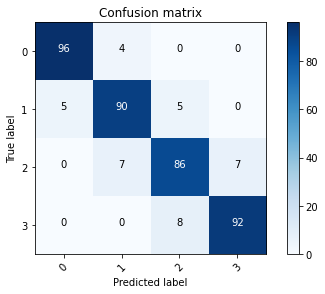

In [ ]:
print_results(calculate_metrics(y_test, y_xg), 'XGBoost')
cm = metrics.confusion_matrix(y_test, y_xg)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

STANDARDIZED DATA

In [ ]:
xg_standard = XGBClassifier()
xg_standard.fit(X_train_standard, y_train_standard)
y_xg_standard = xg_standard.predict(X_test_standard)

Results for XGBoost with standardized data
----
  Accuracy:  0.91
  Precision: 0.90989098909891
  Recall:    0.91
  F1 score:  0.9099227480687017


Confusion matrix:


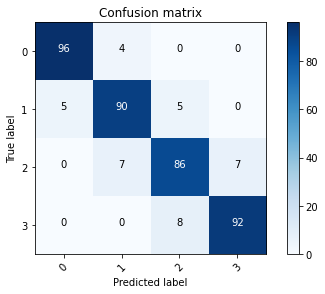

In [ ]:
print_results(calculate_metrics(y_test_standard, y_xg_standard), 'XGBoost with standardized data')
cm = metrics.confusion_matrix(y_test_standard, y_xg_standard)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

NORMALIZED DATA

In [ ]:
xg_normal = XGBClassifier()
xg_normal.fit(X_train_normal, y_train_normal)
y_xg_normal = xg_normal.predict(X_test_normal)

Results for XGBoost with normalized data
----
  Accuracy:  0.91
  Precision: 0.90989098909891
  Recall:    0.91
  F1 score:  0.9099227480687017


Confusion matrix:


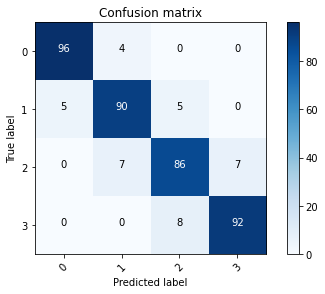

In [ ]:
print_results(calculate_metrics(y_test_normal, y_xg_normal), 'XGBoost with normalized data')
cm = metrics.confusion_matrix(y_test_normal, y_xg_normal)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

## **CATBOOST**

DATA WITHOUT NORMALIZATION AND STANDARIZATION

In [ ]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)
y_cb = cb.predict(X_test)

Learning rate set to 0.081046
0:	learn: 1.2698514	total: 54.7ms	remaining: 54.7s
1:	learn: 1.1724908	total: 60.6ms	remaining: 30.2s
2:	learn: 1.1016397	total: 66.3ms	remaining: 22s
3:	learn: 1.0346736	total: 73.1ms	remaining: 18.2s
4:	learn: 0.9756804	total: 82.1ms	remaining: 16.3s
5:	learn: 0.9164122	total: 89.9ms	remaining: 14.9s
6:	learn: 0.8854168	total: 96.1ms	remaining: 13.6s
7:	learn: 0.8416593	total: 102ms	remaining: 12.7s
8:	learn: 0.8025404	total: 108ms	remaining: 11.9s
9:	learn: 0.7668597	total: 115ms	remaining: 11.3s
10:	learn: 0.7347019	total: 121ms	remaining: 10.9s
11:	learn: 0.7022237	total: 127ms	remaining: 10.5s
12:	learn: 0.6784544	total: 133ms	remaining: 10.1s
13:	learn: 0.6503568	total: 139ms	remaining: 9.8s
14:	learn: 0.6287909	total: 155ms	remaining: 10.2s
15:	learn: 0.6085887	total: 162ms	remaining: 9.96s
16:	learn: 0.5931367	total: 168ms	remaining: 9.7s
17:	learn: 0.5737482	total: 173ms	remaining: 9.45s
18:	learn: 0.5584281	total: 179ms	remaining: 9.22s
19:	lear

Results for CatBoost
----
  Accuracy:  0.9325
  Precision: 0.9328381255056513
  Recall:    0.9325
  F1 score:  0.9325229686803681


Confusion matrix:


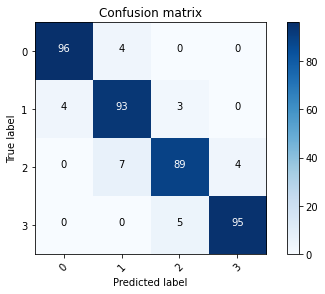

In [ ]:
print_results(calculate_metrics(y_test, y_cb), 'CatBoost')
cm = metrics.confusion_matrix(y_test, y_cb)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

STANDARDIZED DATA

In [ ]:
cb_standard = CatBoostClassifier()
cb_standard.fit(X_train_standard, y_train_standard)
y_cb_standard = cb.predict(X_test_standard)

Learning rate set to 0.081046
0:	learn: 1.2698514	total: 11.1ms	remaining: 11s
1:	learn: 1.1724908	total: 18.2ms	remaining: 9.06s
2:	learn: 1.1016397	total: 24.4ms	remaining: 8.09s
3:	learn: 1.0346736	total: 30.4ms	remaining: 7.58s
4:	learn: 0.9756804	total: 36.6ms	remaining: 7.29s
5:	learn: 0.9164122	total: 42.9ms	remaining: 7.1s
6:	learn: 0.8854168	total: 49ms	remaining: 6.95s
7:	learn: 0.8416593	total: 55.4ms	remaining: 6.87s
8:	learn: 0.8025404	total: 61.7ms	remaining: 6.79s
9:	learn: 0.7668597	total: 67.9ms	remaining: 6.73s
10:	learn: 0.7347019	total: 74ms	remaining: 6.65s
11:	learn: 0.7022237	total: 80.5ms	remaining: 6.63s
12:	learn: 0.6784544	total: 86.9ms	remaining: 6.6s
13:	learn: 0.6503568	total: 93.3ms	remaining: 6.57s
14:	learn: 0.6287909	total: 99.5ms	remaining: 6.53s
15:	learn: 0.6085887	total: 106ms	remaining: 6.5s
16:	learn: 0.5931367	total: 116ms	remaining: 6.72s
17:	learn: 0.5737482	total: 122ms	remaining: 6.67s
18:	learn: 0.5584281	total: 128ms	remaining: 6.61s
19:	l

Results for CatBoost with standardized data
----
  Accuracy:  0.25
  Precision: 0.8125
  Recall:    0.25
  F1 score:  0.1


Confusion matrix:


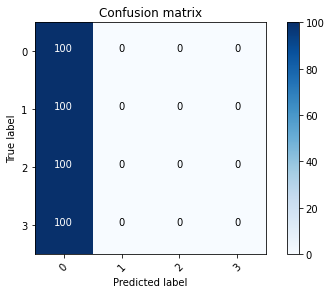

In [ ]:
print_results(calculate_metrics(y_test_standard, y_cb_standard), 'CatBoost with standardized data')
cm = metrics.confusion_matrix(y_test_standard, y_cb_standard)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

NORMALIZED DATA

In [ ]:
cb_normal = CatBoostClassifier()
cb_normal.fit(X_train_normal, y_train_normal)
y_cb_normal = cb.predict(X_test_normal)

Learning rate set to 0.081046
0:	learn: 1.2698514	total: 7.31ms	remaining: 7.3s
1:	learn: 1.1724908	total: 13.1ms	remaining: 6.54s
2:	learn: 1.1016397	total: 18.9ms	remaining: 6.27s
3:	learn: 1.0346736	total: 24.7ms	remaining: 6.14s
4:	learn: 0.9756804	total: 30.4ms	remaining: 6.04s
5:	learn: 0.9164122	total: 36.4ms	remaining: 6.02s
6:	learn: 0.8854168	total: 42ms	remaining: 5.96s
7:	learn: 0.8416593	total: 48ms	remaining: 5.95s
8:	learn: 0.8025404	total: 55.4ms	remaining: 6.1s
9:	learn: 0.7668597	total: 64.1ms	remaining: 6.34s
10:	learn: 0.7347019	total: 69.8ms	remaining: 6.28s
11:	learn: 0.7022237	total: 75.5ms	remaining: 6.22s
12:	learn: 0.6784544	total: 81.2ms	remaining: 6.16s
13:	learn: 0.6503568	total: 86.9ms	remaining: 6.12s
14:	learn: 0.6287909	total: 92.7ms	remaining: 6.09s
15:	learn: 0.6085887	total: 101ms	remaining: 6.24s
16:	learn: 0.5931367	total: 108ms	remaining: 6.22s
17:	learn: 0.5737482	total: 114ms	remaining: 6.21s
18:	learn: 0.5584281	total: 120ms	remaining: 6.18s
19

Results for CatBoost with normalized data
----
  Accuracy:  0.25
  Precision: 0.8125
  Recall:    0.25
  F1 score:  0.1


Confusion matrix:


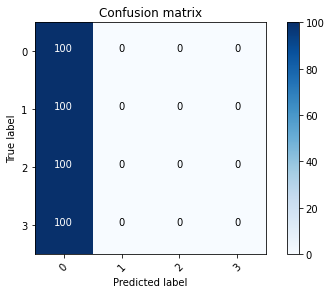

In [ ]:
print_results(calculate_metrics(y_test_normal, y_cb_normal), 'CatBoost with normalized data')
cm = metrics.confusion_matrix(y_test_normal, y_cb_normal)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

# **6. CHOOSING AND CALIBRATING THE BEST MODEL**

In [ ]:
cb.feature_importances_

array([14.9322906 ,  0.18630191,  1.13468478,  0.10396784,  0.89751771,
        0.2698271 ,  1.91419914,  1.06592218,  2.35943046,  1.03874135,
        1.01922631,  7.57460416,  8.42509517, 54.36833816,  1.38742822,
        1.07161095,  1.54317476,  0.15556909,  0.30434261,  0.24772751])

In [ ]:
important_columns = dict(zip(X_standard.columns, cb.feature_importances_))

In [ ]:
def drop_column(df, cols):
    for column, value in cols.items():
        if value < 1:
            df.drop(column, axis=1, inplace=True)
        
    return df

X_new = drop_column(X, important_columns)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, random_state = 5, stratify = y)

In [ ]:
cb_final = CatBoostClassifier()
cb_final.fit(X_train_new, y_train_new)
y_cb_new = cb_final.predict(X_test_new)

Learning rate set to 0.08078
0:	learn: 1.2701838	total: 6.01ms	remaining: 6.01s
1:	learn: 1.1782179	total: 11.3ms	remaining: 5.63s
2:	learn: 1.0949459	total: 16.3ms	remaining: 5.42s
3:	learn: 1.0381180	total: 21.6ms	remaining: 5.37s
4:	learn: 0.9796573	total: 26.9ms	remaining: 5.36s
5:	learn: 0.9250460	total: 32.2ms	remaining: 5.33s
6:	learn: 0.8801285	total: 38.9ms	remaining: 5.52s
7:	learn: 0.8411764	total: 44ms	remaining: 5.45s
8:	learn: 0.8048246	total: 49.5ms	remaining: 5.46s
9:	learn: 0.7646336	total: 55.2ms	remaining: 5.46s
10:	learn: 0.7374232	total: 60.7ms	remaining: 5.46s
11:	learn: 0.7078432	total: 71ms	remaining: 5.85s
12:	learn: 0.6804816	total: 81.7ms	remaining: 6.2s
13:	learn: 0.6511559	total: 87.2ms	remaining: 6.14s
14:	learn: 0.6298259	total: 92.5ms	remaining: 6.08s
15:	learn: 0.6125917	total: 97.7ms	remaining: 6.01s
16:	learn: 0.5921149	total: 103ms	remaining: 5.95s
17:	learn: 0.5742544	total: 108ms	remaining: 5.89s
18:	learn: 0.5551162	total: 113ms	remaining: 5.85s
1

Results for CatBoost
----
  Accuracy:  0.95
  Precision: 0.950227550175943
  Recall:    0.95
  F1 score:  0.9500012867591907


Confusion matrix:


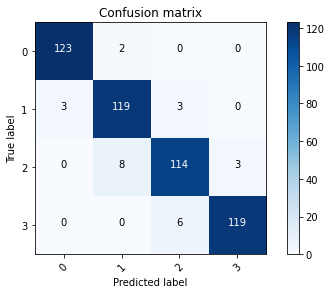

In [ ]:
print_results(calculate_metrics(y_test_new, y_cb_new), 'CatBoost')
cm = metrics.confusion_matrix(y_test_new, y_cb_new)
plot_confusion_matrix(cm, classes=['0', '1', '2', '3'])

#**7. Conclusions**



1.   The price of mobile phones depends on many parameters. The most important feature influencing the price increase is RAM. The larger the RAM, the more expensive the phone.
2.   The use of feature importances helped to improve the model and achieve greater accuracy 0.95.
3.   Taking into consideration the nature of the explained variable - the price of mobile phones - the results would be much more precise for a continuous variable, in such a case the model, receiving technical parameters, would give a similar price of the phone. On the other hand, the classification will be more useful for customer segmentation for marketing purposes.



